In [2]:
!pip install torchvision

In [3]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
from torchvision import datasets
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.85MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.0MB/s]


In [6]:
train_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
)

In [7]:
class_name = train_dataset.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [35]:
img, label = train_dataset[0]

In [36]:
img.shape

torch.Size([1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

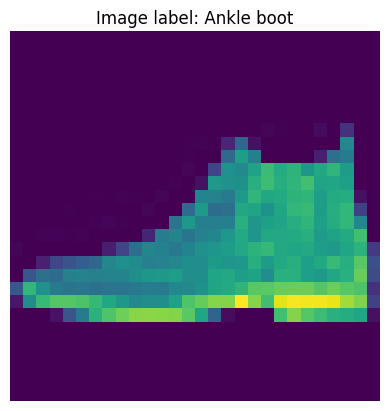

In [42]:
plt.imshow(img.squeeze())
plt.title(f"Image label: {class_name[label]}")
plt.axis(False)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

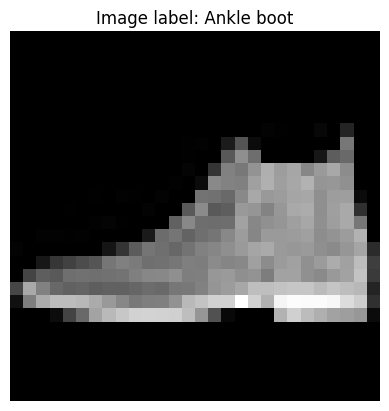

In [43]:
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Image label: {class_name[label]}")
plt.axis(False)